## <snap style="color:MediumSeaGreen"><b>0. Preface</b></snap>

Backpropagation (short for "backward propagation of errors") is an algorithm used in artificial neural networks to compute the gradient of the loss function with respect to the network's weights. This process allows the network to learn and adjust its parameters (weights and biases) to minimize errors and improve performance on a given task.

### *Key Components:*
#### 1. Feedforward Process:
In this step, the input data is passed through the network, layer by layer, to compute the output (also called the prediction). The network applies weights, biases, and activation functions in each layer.

#### 2. Loss Function:
The difference between the network's predicted output and the actual target output is measured using a loss function (e.g., mean squared error, cross-entropy). This gives a scalar value that represents how far off the prediction is from the true output.

#### 3. Backpropagation of Errors:
In this phase, the algorithm works backwards, starting from the output layer and moving through the network toward the input layer. The goal is to calculate the gradient (partial derivative) of the loss function with respect to each weight and bias in the network. This is done by applying the chain rule of calculus to propagate the error from the output back through each layer.

#### 4. Weight Update (Gradient Descent):
After computing the gradients, the network updates its weights and biases using an optimization algorithm (typically gradient descent or one of its variants). The update reduces the error by adjusting the weights in the direction opposite to the gradient.

### *Detailed Steps:*
**1. Forward Pass:** Compute the output of the network by feeding input through the network layers.<br>
**2. Compute the Loss:** Evaluate the error by calculating the loss between the predicted output and the true target.<br>
**3. Backward Pass:**
Compute the gradient of the loss with respect to the weights at the output layer.
Use the chain rule to propagate these gradients backward through the hidden layers.<br>
**4. Update Weights:** Adjust the weights based on the computed gradients to minimize the loss.

### *Importance:*
- **Learning:** Backpropagation allows neural networks to learn from data by adjusting the model's parameters to fit the training data better.<br>
- **Efficiency:** It efficiently computes the gradient, even for deep networks, by avoiding redundant calculations through dynamic programming techniques.<br>

### *Mathematical Basis:*
If $L$ is the loss function, $W$ represents the weights, and $a$ is the activation function, the gradients are computed as: 
$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial a} \times \frac{\partial a}{\partial W}$$

 

The backpropagation algorithm ensures that this calculation happens efficiently for every layer in the network, making it crucial for training deep learning models.

## <snap style="color:MediumSeaGreen"><b>1. Backpropagation & Gradient Descent</b></snap>

Backpropagation is the process of computing the gradient of the loss function with respect to each of the weights in the network. These gradients tell us how much a change in each weight would affect the overall error. Once we have these gradients, we can update the weights using gradient descent, a common optimization algorithm.

Gradient descent updates the weights by taking a small step in the direction of the negative gradient (i.e., the direction that reduces the loss). The update rule is:
$$\boldsymbol{w_{new} = w_{old} - \eta \cdot \frac{\partial L}{\partial w}}$$
$$\boldsymbol{b_{new} = b_{old} - \eta \cdot \frac{\partial L}{\partial b}}$$

where:

- $\eta$ is the learning rate, a small constant that controls the step size.
- $\large\frac{\partial L}{\partial w}$ , $\large\frac{\partial L}{\partial b}$ is the gradient of the loss function with respect to the weight and bias.

To update the weights $w$ and biases $b$, we need to calculate how the loss changes with respect to each weight and bias in the network. This involves applying the chain rule to propagate the error backward through the network, layer by layer.

The process involves:

1. Calculating the output error, which is the difference between the predicted output $\hat{y}$ and the true target $y$.
2. Backpropagating the error to the hidden layer, adjusting the weights connecting the hidden neurons to the output neuron.
3. Backpropagating the error further, adjusting the weights connecting the input neurons to the hidden neurons.

Once the gradients are computed for all weights and biases, they can be updated accordingly.

## <snap style="color:MediumSeaGreen"><b>2. Step-by-Step process</b></snap>

Think of doing back-propagation this way:

1. We initialize our neural network with a random set of weights. 
2. We ask the neural network to make a prediction on a data point from our training set.
3. We compute the prediction and then the loss/cost function, which tells us how good/bad of a job we did at making the correct prediction.
4. We compute the gradient off the loss.
5. And then we ever-so-slightly tweak the parameters of the neural network such that our predictions are better.

We do this over and over again until our model is said to “converge” and is able to make reliable, accurate predictions.


In [ ]:
#| code-fold: false
# Weight and bias initialization
Initialize weights (w) and bias (b) randomly

# Repeat for a number of epochs e.g, 10 or 100
for i in range(epochs):  
    Shuffle the training data

    # Loop over each training example
    for j in range(input.shape[1]): 
        # --- Forward Pass ---
        z = dot_product(w.T, inputs[j]) + b  # Pre-activation
        y_predicted = activation_function(z)  # Apply activation function (e.g., sigmoid)

        # --- Calculate Loss ---
        loss = loss_function(y_actual[j], y_predicted)  # e.g., binary cross-entropy

        # --- Backward Pass (Backpropagation) ---
        # Calculate gradients (using chain rule)
        dL_dw = derivative of loss with respect to weights (w)
        dL_db = derivative of loss with respect to bias (b)

        # --- Update Weights and Bias ---
        w = w - learning_rate * dL_dw  # Update weights
        b = b - learning_rate * dL_db  # Update bias

# End of training


## <snap style="color:MediumSeaGreen"><b>3. Gradient calculation</b></snap>

### <b><snap style="color:teal"> (i) for Regression </snap></b>

**Backpropagation with Mean-squared Error Loss and Linear Activation Function**

#### Definitions and Notations:
- **Loss function**: 
  $$
  L = (y - \hat{y})^2
  $$
  where $y$ is the true target and $\hat{y}$ is the predicted output.

- **Weights and biases**:
  - Weights from inputs to hidden layer 1:
    - $\boldsymbol{w_{11}^1}$, $\boldsymbol{w_{12}^1}$ (weights to neuron 1 in hidden layer 1),
    - $\boldsymbol{w_{21}^1}$, $\boldsymbol{w_{22}^1}$ (weights to neuron 2 in hidden layer 1),
  - Biases for hidden layer 1:
    - $\boldsymbol{b_{11}}$ (bias for neuron 1),
    - $\boldsymbol{b_{12}}$ (bias for neuron 2),
  - Weights from hidden layer 1 to the output:
    - $\boldsymbol{w_{11}^2}$ (weight from neuron 1 in hidden layer 1 to the output),
    - $\boldsymbol{w_{21}^2}$ (weight from neuron 2 in hidden layer 1 to the output),
  - Bias for the output layer:
    - $\boldsymbol{b_{21}}$ (bias for the output neuron).

- **Outputs of hidden layer neurons**:
  - Output of neuron 1 in hidden layer 1: $\boldsymbol{O_{11}}$,
  - Output of neuron 2 in hidden layer 1: $\boldsymbol{O_{12}}$.

#### 1. **Forward Pass Equations**

1. **Hidden layer activations** (linear activation function):
   - Neuron 1 in hidden layer 1: 
     $$
     O_{11} = w_{11}^1 x_1 + w_{21}^1 x_2 + b_{11}
     $$
   - Neuron 2 in hidden layer 1: 
     $$
     O_{12} = w_{12}^1 x_1 + w_{22}^1 x_2 + b_{12}
     $$

2. **Output layer activation**:
   - Output neuron:
     $$
     \hat{y} = w_{11}^2 O_{11} + w_{21}^2 O_{12} + b_{21}
     $$

3. **Loss Function**: The loss function is:
   $$
   L = (y - \hat{y})^2
   $$
   where $y$ is the true target and $\hat{y}$ is the predicted output.

#### 2. **Backward Pass: Gradient Calculation**

To update the weights and biases, we calculate the gradients of the loss $L$ with respect to all weights and biases using the chain rule.

##### **Step 1: Gradient of the Loss w.r.t. the Output Layer**

The gradient of the loss $L$ with respect to the predicted output $\hat{y}$ is:
$$
\frac{\partial L}{\partial \hat{y}} = 2(y - \hat{y})(-1) = -2(y - \hat{y})
$$

Now we calculate the gradients of the loss with respect to the weights $w_{11}^2$, $w_{21}^2$, and the bias $b_{21}$.

- For $w_{11}^2$ (weight from $O_{11}$ to the output):
  $$
  \frac{\partial L}{\partial w_{11}^2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_{11}^2} = -2(y - \hat{y}) \cdot O_{11}
  $$

- For $w_{21}^2$ (weight from $O_{12}$ to the output):
  $$
  \frac{\partial L}{\partial w_{21}^2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_{21}^2} = -2(y - \hat{y}) \cdot O_{12}
  $$

- For $b_{21}$ (bias for the output neuron):
  $$
  \frac{\partial L}{\partial b_{21}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b_{21}} = -2(y - \hat{y})
  $$

##### **Step 2: Gradient of the Loss w.r.t. the Hidden Layer**

Now, we propagate the error back to the hidden layer, calculating the gradients of the loss with respect to the outputs $O_{11}$ and $O_{12}$.

- For $O_{11}$:
  $$
  \frac{\partial L}{\partial O_{11}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_{11}} = -2(y - \hat{y}) \cdot w_{11}^2
  $$

- For $O_{12}$:
  $$
  \frac{\partial L}{\partial O_{12}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_{12}} = -2(y - \hat{y}) \cdot w_{21}^2
  $$

##### **Step 3: Gradient of the Loss w.r.t. Weights from Input to Hidden Layer**

Next, we calculate the gradients of the loss with respect to the weights from the input layer to the hidden layer neurons.

- For $w_{11}^1$ (weight from $x_1$ to neuron 1 in hidden layer 1):
  $$
  \frac{\partial L}{\partial w_{11}^1} = \frac{\partial L}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial w_{11}^1} = -2(y - \hat{y}) \cdot w_{11}^2 \cdot x_1
  $$

- For $w_{21}^1$ (weight from $x_2$ to neuron 1 in hidden layer 1):
  $$
  \frac{\partial L}{\partial w_{21}^1} = \frac{\partial L}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial w_{21}^1} = -2(y - \hat{y}) \cdot w_{11}^2 \cdot x_2
  $$

- For $w_{12}^1$ (weight from $x_1$ to neuron 2 in hidden layer 1):
  $$
  \frac{\partial L}{\partial w_{12}^1} = \frac{\partial L}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial w_{12}^1} = -2(y - \hat{y}) \cdot w_{21}^2 \cdot x_1
  $$

- For $w_{22}^1$ (weight from $x_2$ to neuron 2 in hidden layer 1):
  $$
  \frac{\partial L}{\partial w_{22}^1} = \frac{\partial L}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial w_{22}^1} = -2(y - \hat{y}) \cdot w_{21}^2 \cdot x_2
  $$

##### **Step 4: Gradient of the Loss w.r.t. Biases in the Hidden Layer**

Finally, we compute the gradients of the loss with respect to the biases in the hidden layer.

- For $b_{11}$ (bias for neuron 1 in hidden layer 1):
  $$
  \frac{\partial L}{\partial b_{11}} = \frac{\partial L}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial b_{11}} = -2(y - \hat{y}) \cdot w_{11}^2
  $$

- For $b_{12}$ (bias for neuron 2 in hidden layer 1):
  $$
  \frac{\partial L}{\partial b_{12}} = \frac{\partial L}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial b_{12}} = -2(y - \hat{y}) \cdot w_{21}^2
  $$

#### Summary of Gradients:
- Gradients for the weights from the hidden layer to the output layer:
  - $\large \frac{\partial L}{\partial w_{11}^2} = \small-2(y - \hat{y}) \cdot O_{11}$

  - $\large \frac{\partial L}{\partial w_{21}^2} = \small-2(y - \hat{y}) \cdot O_{12}$

  - $\large \frac{\partial L}{\partial b_{21}} = \small-2(y - \hat{y})$

- Gradients for the weights from the input layer to the hidden layer:
  - $\large \frac{\partial L}{\partial w_{11}^1} = \small-2(y - \hat{y}) \cdot w_{11}^2 \cdot x_1$

  - $\large \frac{\partial L}{\partial w_{21}^1} = \small-2(y - \hat{y}) \cdot w_{11}^2 \cdot x_2$

  - $\large \frac{\partial L}{\partial b_{11}} = \small-2(y - \hat{y}) \cdot w_{11}^2$

  - $\large \frac{\partial L}{\partial w_{12}^1} = \small-2(y - \hat{y}) \cdot w_{21}^2 \cdot x_1$

  - $\large \frac{\partial L}{\partial w_{22}^1} = \small-2(y - \hat{y}) \cdot w_{21}^2 \cdot x_2$
  
  - $\large \frac{\partial L}{\partial b_{12}} = \small-2(y - \hat{y}) \cdot w_{21}^2$

### <b><snap style="color:teal"> (ii) for Classification </snap></b>

**Backpropagation with Binary Cross-Entropy Loss and Sigmoid Activation Function**

#### Definitions and Notations:
- **Inputs:** $x_1, x_2$
- **Hidden Layer Neurons (2 neurons):**
  - Weights from inputs to hidden layer:
    - $\boldsymbol{w_{11}^1}$, $\boldsymbol{w_{21}^1}$ for hidden neuron 1.
    - $\boldsymbol{w_{12}^1}$, $\boldsymbol{w_{22}^1}$ for hidden neuron 2.
  - Biases for hidden neurons: $b_{11}, b_{12}$
- **Output Layer (1 neuron):**
  - Weights from hidden layer to output:
    - $\boldsymbol{w_{11}^2}$, $\boldsymbol{w_{21}^2}$
  - Bias for the output neuron: $\boldsymbol{b_{21}}$
- **Activation function:** Sigmoid for all neurons.
- **Loss function:** Binary Cross-Entropy Loss.
- **True label (target):** $\boldsymbol{y}$
- **Predicted output:** $\boldsymbol{\hat{y}}$

#### **1. Forward Pass Equations:**

1. **Hidden Layer Pre-Activations and Outputs:**

   - For hidden neuron 1:
     $$
     z_{11} = w_{11}^1 \cdot x_1 + w_{21}^1 \cdot x_2 + b_{11}
     $$
     $$
     O_{11} = \sigma(z_{11}) = \frac{1}{1 + e^{-z_{11}}}
     $$

   - For hidden neuron 2:
     $$
     z_{12} = w_{12}^1 \cdot x_1 + w_{22}^1 \cdot x_2 + b_{12}
     $$
     $$
     O_{12} = \sigma(z_{12}) = \frac{1}{1 + e^{-z_{12}}}
     $$

2. **Output Layer Pre-Activation and Output:**

   - The output neuron computes the weighted sum of the hidden layer outputs:
     $$
     z_f = w_{11}^2 \cdot O_{11} + w_{21}^2 \cdot O_{12} + b_{21}
     $$
   
   - The final output of the network $\hat{y}$ is the sigmoid of $z_f$:
     $$
     \hat{y} = \sigma(z_f) = \frac{1}{1 + e^{-z_f}}
     $$

3. **Loss Function:**
The loss function used is **binary cross-entropy**, given by:
$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

#### **2. Backward Pass: Gradient Calculation**

We will now calculate the gradients of the loss $L$ with respect to all the weights and biases.

##### 1. Gradient of Loss w.r.t. Output Layer Pre-activation $z_f$:

First, we need to compute the gradient of the loss with respect to the pre-activation value $z_f$ at the output layer. We use the chain rule:

$$
\frac{\partial L}{\partial z_f} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_f}
$$

- The derivative of the binary cross-entropy loss with respect to $\hat{y}$ is:
  $$
  \frac{\partial L}{\partial \hat{y}} = - \frac{\partial [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]}{\partial \hat{y}} = - \frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
  $$

- The derivative of the sigmoid function is:
  $$
  \frac{\partial \hat{y}}{\partial z_f} = \hat{y}(1 - \hat{y})
  $$

Combining these, we get:
$$
\frac{\partial L}{\partial z_f} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} = -(y - \hat{y})
$$

##### 2. Gradients of Weights and Biases in the Output Layer:

Now that we have $\large\frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f}$, we can calculate the gradients with respect to the weights and bias in the output layer.

- For $w_{11}^2$, the weight connecting hidden neuron 1 to the output:
  $$
  \frac{\partial L}{\partial w_{11}^2} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial w_{11}^2} = -(y - \hat{y}) \cdot O_{11}
  $$

- For $w_{21}^2$, the weight connecting hidden neuron 2 to the output:
  $$
  \frac{\partial L}{\partial w_{21}^2} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial w_{21}^2} = -(y - \hat{y}) \cdot O_{12}
  $$

- For the bias $b_{21}$ in the output layer:
  $$
  \frac{\partial L}{\partial b_{21}} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial b_{21}} = -(y - \hat{y})
  $$

##### 3. Backpropagating to the Hidden Layer:

Next, we propagate the error back to the hidden layer. We calculate the gradients for the hidden layer's pre-activation values $z_{11}$ and $z_{12}$.

- For neuron 1 in the hidden layer, sigmoid $O_{11}$ diff. w.r.t $z_{11}$ is:
  $$
  \frac{\partial O_{11}}{\partial z_{11}} = O_{11}(1 - O_{11}) 
  $$

- For neuron 2 in the hidden layer, sigmoid $O_{12}$ diff. w.r.t $z_{12}$ is:
  $$
  \frac{\partial O_{12}}{\partial z_{12}} = O_{12}(1 - O_{12}) 
  $$

##### 4. Gradients of Weights and Biases in the Hidden Layer:

Finally, we calculate the gradients of the weights and biases for the hidden layer.

- For $w_{11}^1$, the weight connecting input $x_1$ to hidden neuron 1:
  $$
  \frac{\partial L}{\partial w_{11}^1} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial z_{11}} \cdot \frac{\partial z_{11}}{\partial w_{11}^1} = -(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11}) \cdot x_1
  $$

- For $w_{21}^1$, the weight connecting input $x_2$ to hidden neuron 2:
  $$
  \frac{\partial L}{\partial w_{21}^1} =\frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial z_{11}} \cdot \frac{\partial z_{11}}{\partial w_{21}^1}= -(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11}) \cdot x_2 
  $$

- Bias for hidden neuron 1:
  $$
  \frac{\partial L}{\partial b_{11}} =\frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{11}} \cdot \frac{\partial O_{11}}{\partial z_{11}} \cdot \frac{\partial z_{11}}{\partial b_{11}}= -(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11})
  $$

- For $w_{12}^1$, the weight connecting input $x_1$ to hidden neuron 1:
  $$
  \frac{\partial L}{\partial w_{12}^1} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial z_{12}} \cdot \frac{\partial z_{12}}{\partial w_{12}^1} = -(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12}) \cdot x_1
  $$

- For $w_{22}^1$, the weight connecting input $x_2$ to hidden neuron 2:
  $$
  \frac{\partial L}{\partial w_{22}^1} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial z_{12}} \cdot \frac{\partial z_{12}}{\partial w_{22}^1} = -(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12}) \cdot x_2
  $$

- Bias for hidden neuron 2:
  $$
    \frac{\partial L}{\partial b_{12}} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial z_f} \cdot \frac{\partial z_f}{\partial O_{12}} \cdot \frac{\partial O_{12}}{\partial z_{12}} \cdot \frac{\partial z_{12}}{\partial b_{12}} = -(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12})
  $$


#### Summary of Gradients:

- **Output layer gradients:**
  - $\large \frac{\partial L}{\partial w_{11}^2} = \small -(y - \hat{y}) \cdot O_{11}$
  
  - $\large \frac{\partial L}{\partial w_{21}^2} = \small-(y - \hat{y}) \cdot O_{12}$

  - $\large \frac{\partial L}{\partial b_{21}} = \small-(y - \hat{y})$

- **Hidden layer gradients:**
  - $\large \frac{\partial L}{\partial w_{11}^1} = \small-(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11}) \cdot x_1$

  - $\large \frac{\partial L}{\partial w_{21}^1} = \small-(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11}) \cdot x_2$

  - $\large \frac{\partial L}{\partial b_{11}} = \small-(y - \hat{y}) \cdot w_{11}^2 \cdot O_{11}(1 - O_{11})$

  - $\large \frac{\partial L}{\partial w_{12}^1} = \small-(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12}) \cdot x_1$

  - $\large \frac{\partial L}{\partial w_{22}^1} = \small-(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12}) \cdot x_2$

  - $\large \frac{\partial L}{\partial b_{12}} = \small-(y - \hat{y}) \cdot w_{21}^2 \cdot O_{12}(1 - O_{12})$


## <snap style="color:MediumSeaGreen"><b>4. Derivative of Activation Functions</b></snap>

### <b><snap style="color:teal"> (i) Sigmoid Function</snap></b>

The sigmoid function is defined as:
$$
\boldsymbol{\sigma(x) = \frac{1}{1 + e^{-x}}}
$$

#### Step 1: Differentiate the Sigmoid Function

To find the derivative, we use the quotient rule. The quotient rule states that if $f(x) = \frac{g(x)}{h(x)}$, then:
$$
f'(x) = \frac{g'(x)h(x) - g(x)h'(x)}{[h(x)]^2}
$$

In our case:

- $g(x) = 1$
- $h(x) = 1 + e^{-x}$

#### Step 2: Calculate Derivatives

1. Calculate $g'(x)$:
   $$
   g'(x) = 0
   $$

2. Calculate $h'(x)$:
   $$
   h'(x) = \frac{d}{dx}(1 + e^{-x}) = -e^{-x}
   $$

#### Step 3: Apply the Quotient Rule

Using the quotient rule:
$$
\sigma'(x) = \frac{0 \cdot (1 + e^{-x}) - 1 \cdot (-e^{-x})}{(1 + e^{-x})^2}
$$

This simplifies to:

$$
\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}
$$

#### Step 4: Simplify Further

We can rewrite $\sigma'(x)$ in terms of $\sigma(x)$:
$$
\sigma(x) = \frac{1}{1 + e^{-x}} \implies 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}
$$

simplifying,
$$
\sigma'(x)= \frac{e^{-x}}{(1 + e^{-x})^2} = \frac{1}{(1 + e^{-x})}\cdot\frac{e^{-x}}{(1 + e^{-x})} =\sigma(x)(1 - \sigma(x))
$$

Hence, the derivative of sigmoid is:
<table><td>

$$
\large \sigma'(x)= \sigma(x)\cdot[1 - \sigma(x)]
$$
</td></table>

* The graph of the Sigmoid function looks like an ‘S’ curve, and it is a continuous and differentiable function at any point in its domain. It is used to introduce non-linearity in neural networks.

* The main issue related to the activation function is when the new weights and biases are calculated by the gradient descent algorithm, if these values are very small, then the updates of the weights and biases will also be very low and hence, which results in vanishing gradient problem, where the model will not learn anything.

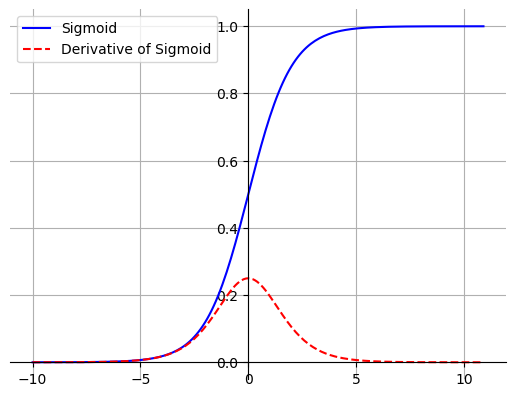

In [57]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,11,0.1)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, sigmoid(x), 'b', label='Sigmoid')

# Plot derivative of sigmoid
ax.plot(x, dsigmoid(x), 'r--', label='Derivative of Sigmoid')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')  # Hide the right spine

# Move the x-axis to the center (y=0)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
# Add labels and legend

ax.legend()

# Show the plot
plt.grid(True)
plt.show()

### <b><snap style="color:teal"> (ii) Tanh Function</snap></b>

The hyperbolic tangent function is defined as:
$$
\boldsymbol{\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}}
$$

#### Step 1: Differentiate the Tanh Function

To find the derivative, we again use the quotient rule where:

- $g(x) = e^x - e^{-x}$
- $h(x) = e^x + e^{-x}$

#### Step 2: Calculate Derivatives

1. Calculate $g'(x)$:
   $$
   g'(x) = e^x + e^{-x}
   $$

2. Calculate $h'(x)$:
   $$
   h'(x) = e^x - e^{-x}
   $$

#### Step 3: Apply the Quotient Rule

Using the quotient rule: $f'(x) = \large\frac{g'(x)h(x) - g(x)h'(x)}{[h(x)]^2}$

$$
\tanh'(x) = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2}
$$

#### Step 4: Simplify

This simplifies to:
$$
\tanh'(x) = \frac{(e^x + e^{-x})^2 - (e^x - e^{-x})^2}{(e^x + e^{-x})^2} = \frac{(e^x + e^{-x})^2}{(e^x + e^{-x})^2}-\frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2}
$$

$$
\tanh'(x) = 1-\left(\frac{e^x - e^{-x}}{e^x + e^{-x}}\right)^2 = 1 - \tanh^2(x)
$$

Hence, the derivative of the tanh function is:
<table><td>

$$\large \tanh'(x) = 1 - \tanh^2(x)$$

</td></table>

* Stronger gradient compared to sigmoid.
* An advantage of the tanh function is that its derivative (gradient vector) is relatively higher than that of the sigmoid function, especially around the origin. This property can help alleviate the vanishing gradient problem during backpropagation.
* But it  addresses the vanishing gradient issue to some extent. Still prone to vanishing gradient problems.

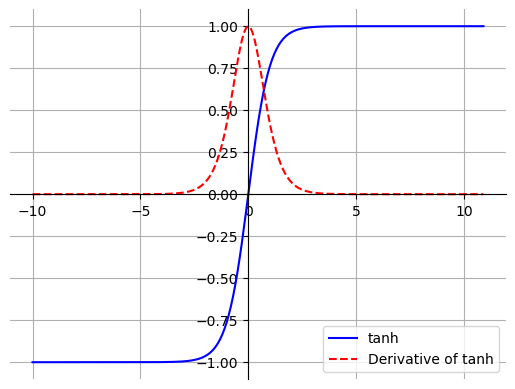

In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,11,0.1)
def tanhh(x):
    return np.tanh(x)
def dtanhh(x):
    return 1 - (np.tanh(x))**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, tanhh(x), 'b', label='tanh')

# Plot derivative of sigmoid
ax.plot(x, dtanhh(x), 'r--', label='Derivative of tanh')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')  # Hide the right spine

# Move the x-axis to the center (y=0)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
# Add labels and legend

ax.legend(loc="lower right")

# Show the plot
plt.grid(True)
plt.show()